In [ ]:
!pip install download

In [ ]:
!pip install fbprophet==0.6

In [ ]:
conda install -c anaconda ephem

In [ ]:
conda install -c conda-forge pystan

In [ ]:
conda install -c conda-forge fbprophet

In [ ]:
pip install holidays==0.9.11

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from download import download

import fbprophet

mpl.rcParams['figure.figsize'] = (20, 18)
mpl.rcParams['axes.grid'] = False

In [2]:
def convert_to_date(x):
 return datetime.strptime(x, '%Y %m %d %H')

In [3]:
aq_df = pd.read_excel('Revised Volume Data.xls' , sheet_name='Revised Volume Data',  parse_dates=['Date']) #, index_col='Date', squeeze=True)  

In [4]:
aq_df

,Date,ForecastVolume,OfferedVolume,VolumewithinSL/IntervalMetCount,Offered%,SL%
0,2019-01-01,11002.389992,4248,3217.0,0.386098,0.757298
1,2019-01-02,11577.884555,0,0.0,-,-
2,2019-01-03,12885.784101,10001,8227.0,0.776127,0.822618
3,2019-01-04,12281.306114,10345,10259.0,0.842337,0.991687
4,2019-01-05,11586.712135,10022,9795.0,0.864956,0.97735
...,...,...,...,...,...,...
634,2020-09-26,20000.000000,18100,12893.0,0.905,0.71232
635,2020-09-27,0.000000,0,0.0,-,-
636,2020-09-28,0.000000,0,0.0,-,-
637,2020-09-29,20000.000000,18567,9675.0,0.92835,0.521086


In [ ]:
aq_df['Month'] = pd.to_datetime(aq_df['Date'], format='%m').dt.month_name().str.slice(stop=3)
aq_df['Year'] = pd.to_datetime(aq_df['Date'], format='%YYYY').dt.year

In [ ]:
aq_df.head()

In [5]:
aq_df.set_index('Date')

,ForecastVolume,OfferedVolume,VolumewithinSL/IntervalMetCount,Offered%,SL%
Date,,,,,
2019-01-01,11002.389992,4248,3217.0,0.386098,0.757298
2019-01-02,11577.884555,0,0.0,-,-
2019-01-03,12885.784101,10001,8227.0,0.776127,0.822618
2019-01-04,12281.306114,10345,10259.0,0.842337,0.991687
2019-01-05,11586.712135,10022,9795.0,0.864956,0.97735
...,...,...,...,...,...
2020-09-26,20000.000000,18100,12893.0,0.905,0.71232
2020-09-27,0.000000,0,0.0,-,-
2020-09-28,0.000000,0,0.0,-,-


In [ ]:
aq_df = aq_df.set_index('Date').groupby('Month').resample('D').mean()

In [ ]:
aq_df

In [ ]:
#aq_df.reset_index()

In [ ]:
aq_df.info()

In [ ]:
aq_df.query("Month=='Jan'")[['ForecastVolume','OfferedVolume']].plot()

In [ ]:
aq_df

In [ ]:
aq_df["Month"].unique()

In [6]:
from fbprophet import Prophet

In [11]:
aq_df_final=aq_df[['Date','OfferedVolume']].rename({'Date':'ds','OfferedVolume':'y'}, axis='columns')

In [12]:
aq_df_final.head()

,ds,y
0,2019-01-01,4248
1,2019-01-02,0
2,2019-01-03,10001
3,2019-01-04,10345
4,2019-01-05,10022


In [ ]:
aq_df_final.set_index('Date')

In [20]:
train=aq_df_final[(aq_df_final['ds'] <= '2020-06-30') ] 
test=aq_df_final[(aq_df_final['ds'] > '2020-06-30')]

In [21]:
train.shape

(547, 2)

In [17]:
test.shape

(92, 2)

In [47]:
m = Prophet(interval_width=0.95)

In [48]:
m.fit(test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future = m.make_future_dataframe(periods=31)

In [50]:
forecast = m.predict(future)  

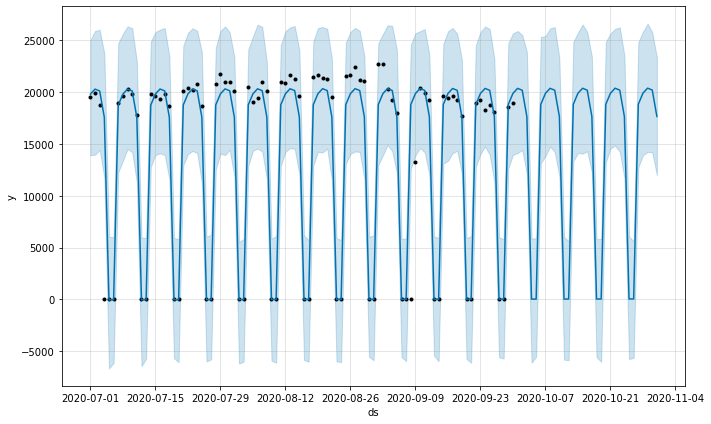

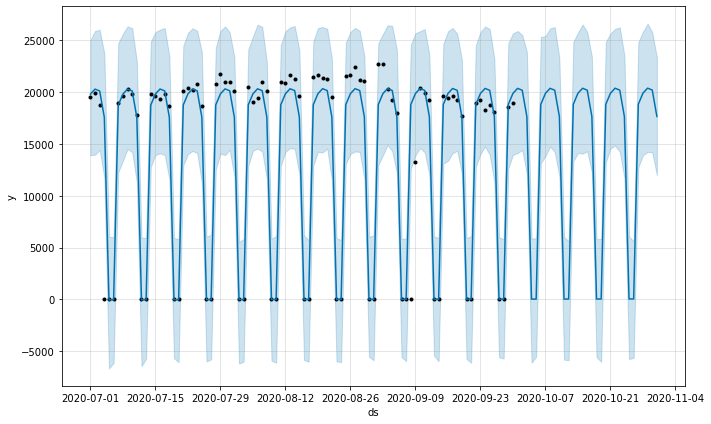

In [51]:
m.plot(forecast) 

In [52]:
 forecast = forecast.rename(columns={'yhat': 'yhat_'})

In [53]:
target = pd.DataFrame()
target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

In [54]:
target

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_
ds,,,,,,,,,,,,,,,
2020-07-01,13772.675195,13898.832360,25010.072673,13772.675195,13772.675195,6029.160579,6029.160579,6029.160579,6029.160579,6029.160579,6029.160579,0.0,0.0,0.0,19801.835774
2020-07-02,13773.551235,13967.934019,25900.963168,13773.551235,13773.551235,6512.678122,6512.678122,6512.678122,6512.678122,6512.678122,6512.678122,0.0,0.0,0.0,20286.229357
2020-07-03,13774.427274,14413.071314,26002.701726,13774.427274,13774.427274,6330.289341,6330.289341,6330.289341,6330.289341,6330.289341,6330.289341,0.0,0.0,0.0,20104.716615
2020-07-04,13775.303314,11745.695411,23733.649494,13775.303314,13775.303314,3785.347434,3785.347434,3785.347434,3785.347434,3785.347434,3785.347434,0.0,0.0,0.0,17560.650748
2020-07-05,13776.179354,-6661.210972,6061.724014,13776.179354,13776.179354,-13811.104907,-13811.104907,-13811.104907,-13811.104907,-13811.104907,-13811.104907,0.0,0.0,0.0,-34.925553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,13864.841595,12734.362671,24797.093534,13864.096612,13865.589101,4965.495053,4965.495053,4965.495053,4965.495053,4965.495053,4965.495053,0.0,0.0,0.0,18830.336647
2020-10-28,13865.565294,13907.523905,25823.734217,13864.785864,13866.371617,6029.160579,6029.160579,6029.160579,6029.160579,6029.160579,6029.160579,0.0,0.0,0.0,19894.725873
2020-10-29,13866.288993,14229.561504,26600.787598,13865.472369,13867.156179,6512.678122,6512.678122,6512.678122,6512.678122,6512.678122,6512.678122,0.0,0.0,0.0,20378.967115


<AxesSubplot:>

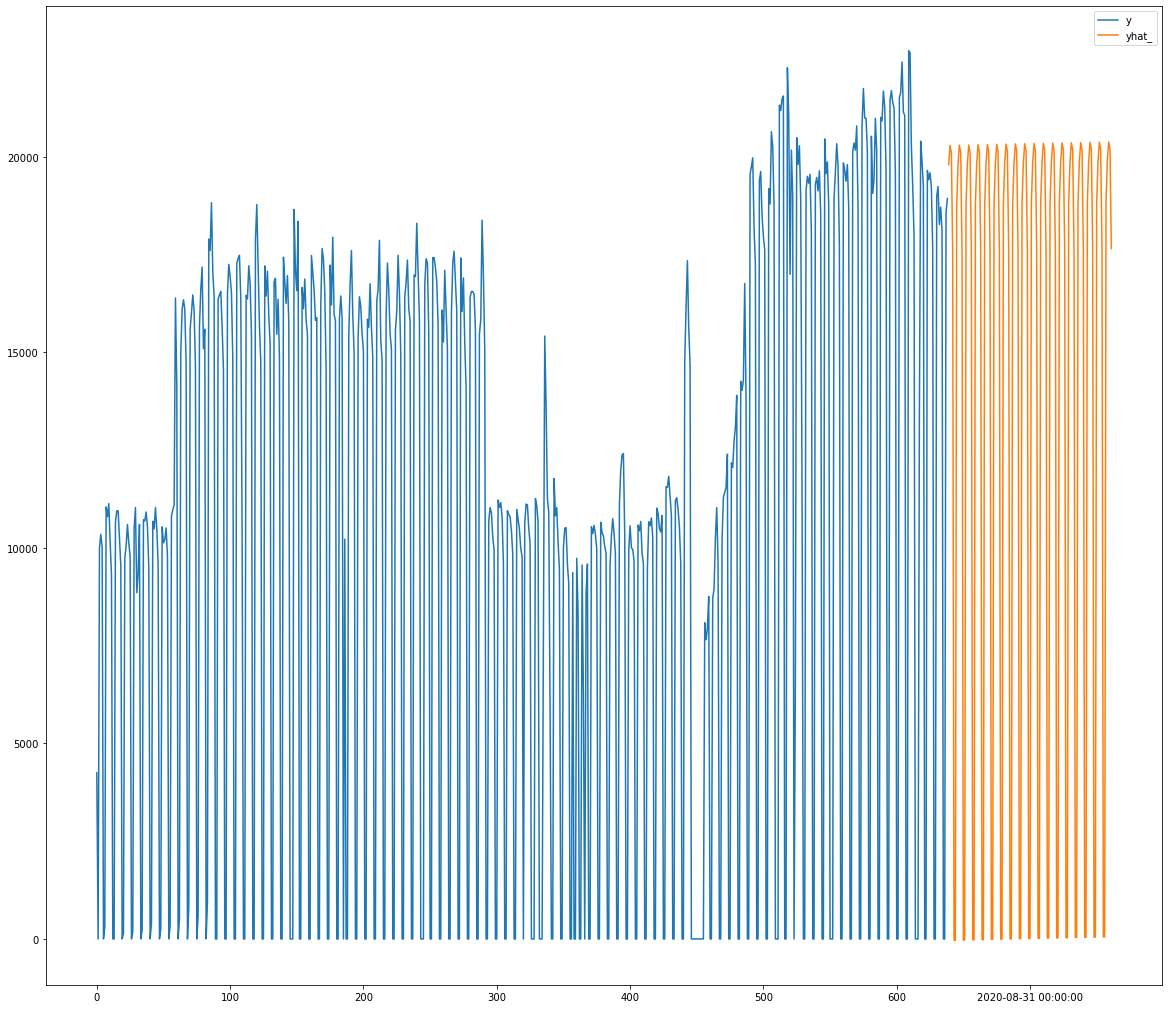

In [62]:
pd.concat([aq_df_final['y'],target['yhat_']],axis=1).plot()

In [61]:
output=pd.concat([aq_df_final['y'],target['yhat_']],axis=1)

In [63]:
output.to_csv('FB_P2.csv',index=True)